<a href="https://colab.research.google.com/github/ChepeAicrag12/Graficacion/blob/master/Trabajo_Bresenham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
import matplotlib.pyplot as plt

N = 50 #Número de filas y columnas de la matriz (cuadrada)
matriz_linea = np.zeros((N,N))#creamos la matriz con ceros en todas las celdas
matriz_circunferencia = np.zeros((N,N))#creamos la matriz con ceros en todas las celdas
linea = [] #Lista en donde se insertarán las coordenadas de los pixeles a pintar con la siguiente forma [x,y] para la línea
circunferencia = [] #Lista en donde se insertarán las coordenadas de los pixeles a pintar con la siguiente forma [x,y] para la circunferencia

In [90]:
def imprimir_linea():
  for c in linea:
    matriz_linea[c[0],c[1]] = 1
    
  plt.imshow(matriz_linea)
  plt.colorbar()
  plt.show()

def imprimir_circunferencia():
  for c in circunferencia:
    matriz_circunferencia[c[0],c[1]] = 1

  plt.imshow(matriz_circunferencia)
  plt.colorbar()
  plt.show()


#Ejercicio 1
Dadas dos coordenadas ingresadas por el usuario (punto inicial y punto final) escribir el código que implemente el algortimo de Bresenham para líneas y encontrar los pixeles que forman parte de la línea que une estos puntos. Al final graficar el resultado. 

20 15
19 15
18 16
17 16
16 16
15 16
14 17
13 17
12 17
11 17
10 18
9 18
8 18
7 18
6 19
5 19
4 19
3 19
2 20
1 20


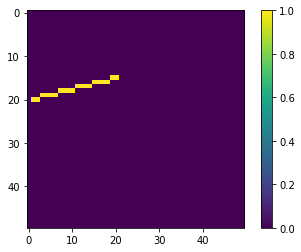

1 20
2 20
3 19
4 19
5 19
6 19
7 18
8 18
9 18
10 18
11 17
12 17
13 17
14 17
15 16
16 16
17 16
18 16
19 15
20 15


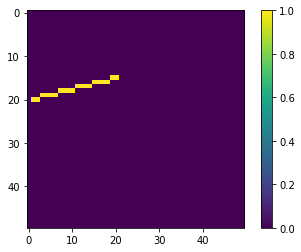

In [152]:
#En esta celda deben escribir su código para ir llenando el array linea, al final se debellamar a la función imprimir para ver el resultado en la pantalla.
  #x0 = int(input('Introduce el valor de x0: '))
  #y0 = int(input('Introduce el valor de y0: '))
  #x1 = int(input('Introduce el valor de x1: '))
  #y1 = int(input('Introduce el valor de y1: '))

def line_bresenham(p1, p2):
  x0, y0 = p1
  x1, y1 = p2
  dif_x, dif_y = x1 - x0, y1 - y0 
  dx, dy = abs(dif_x), abs(dif_y)
  if dy >= dx:
    dx_tmp = dx
    dx, dy = dy, dx_tmp
  inc_E = 2 * dy # 2dy
  inc_NE = inc_E - 2 * dx # 2dy - 2dx
  p = inc_E - dx # 2dy - dx
  x, y = x0, y0
  linea.append([y,x])
  print(x, y)
  x_inc = 1 if dif_x > 0 else - 1
  y_inc = 1 if dif_y > 0 else - 1
  x_inc = x_inc if dif_x != 0 else 0
  y_inc = y_inc if dif_y != 0 else 0
  if dx == 0: 
    dx, x_inc = dy, 0
  for _ in range(dx):
    x = x + x_inc
    if p < 0 and x_inc != 0:
      p = p + inc_E
    else: 
      y = y + y_inc
      p = p + inc_NE
    print(x, y)
    linea.append([y,x])
  imprimir_linea()#Este es el llamado a la función que se encarga de plotear la matriz

#p1 = tuple(list(map(int, input('Introduce el valor de p1: ').split())))
#p2 = tuple(list(map(int, input('Introduce el valor de p2: ').split())))


#line_bresenham((1, 1), (4, 4)) # m = 1 | Cumple
#line_bresenham((4, 4), (1, 1)) #Cumple

#line_bresenham((1, 1), (4, 1)) # m = 0 | Cumple
#line_bresenham((4, 1), (1, 1)) # Cumple


#line_bresenham((1, 1), (1, 4)) # m = infinito | Cumple
#line_bresenham((1, 4), (1, 1)) # Cumple

#line_bresenham((1, 4), (4, 1)) # m = -1 | Cumple
#line_bresenham((4, 1), (1, 4))


#line_bresenham((0, 0), (20, 10)) # Cumple
line_bresenham((20, 15), (1, 20)) # Cumple
line_bresenham((1, 20), (20, 15)) 

#line_bresenham((1, 1), (5, 4))

#Ejercicio 2
Dado un radio ingresado por el usuraio escribir el código que implemente el algortimo de Bresenham para circunferencias y encontrar los pixeles que forman parte de esta circunferencia centrada en el origen. Al final graficar el resultado. 

Introduce el radio r = 10
0 10
1 10
2 10
3 10
4 9
5 9
6 8
7 7


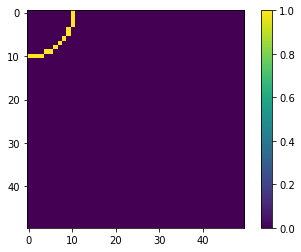

In [79]:
#En esta celda deben escribir su código para ir llenando el array circunferencia, al final se debe llamar a la función imprimir_circunferencia para ver el resultado en la pantalla.
def addPoint(x, y):
  circunferencia.append([x, y])
  circunferencia.append([y, x])
  #circunferencia.append([y, -x])
  #circunferencia.append([x, -y])
  #circunferencia.append([-x, -y])
  #circunferencia.append([-y, -x])
  #circunferencia.append([-x, y])
  #circunferencia.append([-y, x])

def drawCircunferencia(r):
  x, y = 0, r
  p = 5/4 - r
  addPoint(x, y)
  print(x, y)
  while y > x:
    x = x + 1
    aux = p + 2 * x # x = xk + 1  -> dE = 2 (x + 1)  = 2x + 2
    if p < 0:
      p = aux + 1 # -> dE = 2x + 2 + 1 = 2x + 3
    else: 
      p = aux - 2 * y + 3 # dSE = 2x + 2 - 2y + 3  
      y = y - 1 
    print(x, y)
    addPoint(y, x)
  imprimir_circunferencia()#Este es el llamado a la función que se encarga de plotear la matriz

r = int(input('Introduce el radio r = '))
drawCircunferencia(r)